In [2]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
data = pd.read_csv("Mall_Customers.csv") 

In [29]:
#Nos quedamos con dos variables a analizar y agrupar: Edad, Ingresos anuales 
Dx = data.iloc[:, [3, 4]].values

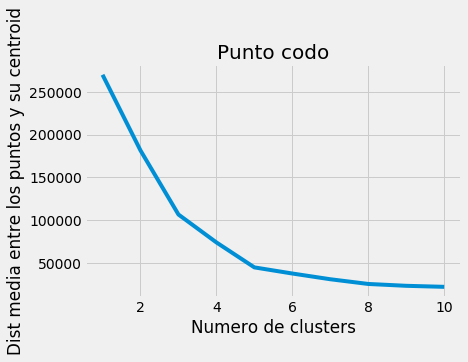

In [30]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(Dx)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Punto codo', fontsize = 20)
plt.xlabel('Numero de clusters')
plt.ylabel('Dist media entre los puntos y su centroid')
plt.show()

A través del método del punto codo establecemos que el número de clusters ideal para realizar la agrupación es de 5.

Los centros iniciales elegidos aleatoriamente son:
[[ 65.87668457  10.04918229]
 [102.8795882   19.25350072]
 [ 15.01395373  34.86495125]
 [ 51.88457386  39.88321247]
 [ 32.90421868  53.80403993]]


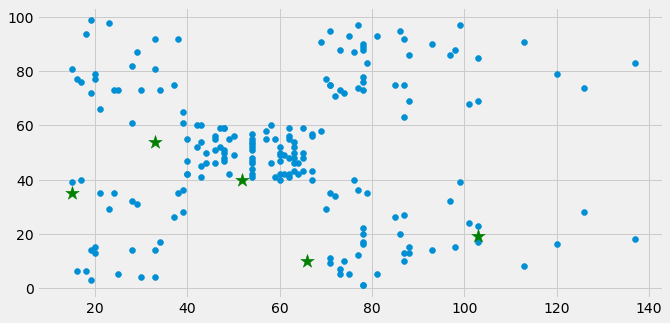

In [31]:
K = 5
np.random.seed(1) # Fijamos una semilla para asegurar la reproducibilidad de la práctica
cDx = np.zeros(K*Dx.shape[1])
cDx.shape = (K,Dx.shape[1])

def random_sample_float(n, mi, ma):
    return (ma - mi) * np.random.random_sample(n) + mi

for d in np.arange(Dx.shape[1]):
    cDx[:,d] = random_sample_float(K, np.min(Dx[:,d]), np.max(Dx[:,d]))

print('Los centros iniciales elegidos aleatoriamente son:')
print(cDx)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='g')

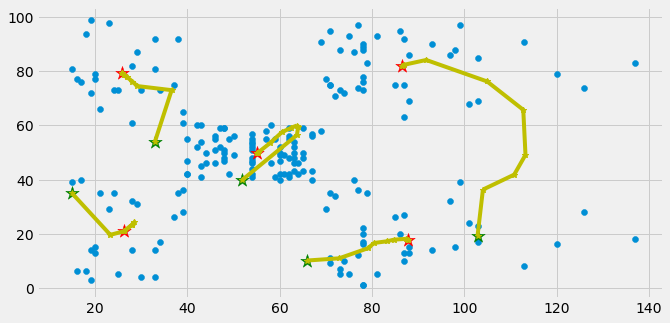

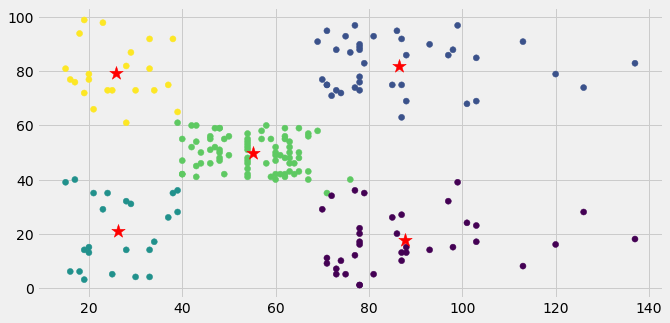

In [32]:
# Definimos la distancia euclidiana de una instancia x 
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):   
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

# Preparamos el vector donde guardamos la asignación de cada elemento 
# a un clúster (1,...,K)
Dyp = np.zeros(Dx.shape[0])

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='g')

# Flag de convergencia
iterando = True

while iterando:

    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()

    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        pred_y = np.argmin(distancia_euclidiana_grupo(Dx[i], cDx))
        Dyp[i] = pred_y

    # Calcular los nuevos centros
    for k in range(K):
        cDx[k,:] = np.mean(Dx[Dyp==k],axis=0)

    for k in np.arange(K):
        ax.plot( [cDx_ant[k,0], cDx[k,0]],[cDx_ant[k,1], cDx[k,1]], linestyle='-', marker='*', c='y')
    
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)

ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')


El algoritmo muestra una fuerte dependencia de los puntos iniciales. Tras cambiar el valor de la semilla 8 veces se logró llegar a una clusterización aceptable.
Además de esto, en las primeras 7 ejecuciones se logró apreciar que los outliers también ejercían bastante influencia en la agrupación, esto se logró apreciar en que en muchas ocaciones se generaban agrupaciones especificamentes para estos puntos, por ejemplo, en reiteradas ocaciones se establecieron como centros puntos entre las coordenadas (100-140, 0- 40) y (100-140, 60-100) que intentaban generar un agrupamientos para los puntos aberrantes

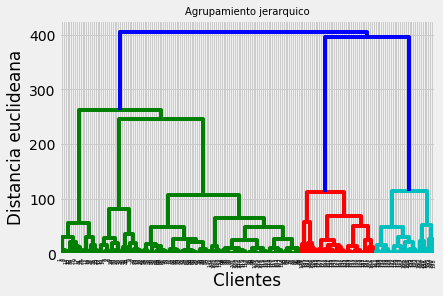

In [33]:
import scipy.cluster.hierarchy as sch
#Realizamos la gráfica a través del método de scipy llamado dendrograme. Como parametros le pasamos 
dendrogram = sch.dendrogram(sch.linkage(Dx, method = 'ward'))
plt.title('Agrupamiento jerarquico', fontsize = 10)
plt.xlabel('Clientes')
plt.ylabel('Distancia euclideana')
plt.show()

Implementamos el algoritmo a través de la librería de sklearn. Como parametros le pasamos el número de clusters, la forma en que vamos a medir la distancia (euclideana).
El parámetro de linkage nos da la opción de elegir el método que utilizaremos para fusionar los pares de clusters. Las alternativas existentes son:
Ward: minimiza la varianza de los grupos que se fusionan.
Avarage: usa el promedio de las distancias de cada observación de los dos conjuntos.
Complete: utiliza las distancias máximas entre todas las observaciones de los dos conjuntos.
Single: usa el mínimo de las distancias entre todas las observaciones de los dos conjuntos.

## Agrupamiento jerarquico 

Implementamos el método para agrupamiento jerarquico disponible en sklearn en donde establecemos 3 parametros:

- N° de clusters
- Affinity: se establece la forma en que se calculará la distancia 
- Linkage: Se establece  cual es el criterio de vinculación  entre los pares de cluster. El algoritmo fusionará los pares de clúster que minimizan este criterio
           Dentro de los criterios se encuentran:
           - average: usa el promedio de las distancias de cada observación de los dos conjuntos.
           - complete: utiliza las distancias máximas entre todas las observaciones de los dos conjuntos.
           - single: usa el mínimo de las distancias entre todas las observaciones de los dos conjuntos.

In [34]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

Realizamos el agrupamiento del data set x de acuerdo a lo parametrizado en hc

In [35]:
y_hc = hc.fit_predict(Dx)

Miramos como quedo el agrupamiento

In [36]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

Pintamos los puntos de acuerdo a su agrupación obtenida esto a través de una mascara. La mascara es posible generarla ya que tenemos el array con las respectivas clasificaciones obtenidas al entrenar el modelo.
De esta forma podemos filtrar los datos de acuerdo a la agrupación y asignarles un color 

No handles with labels found to put in legend.


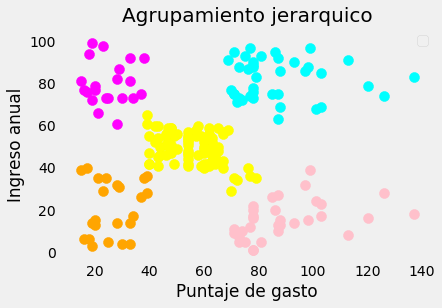

In [37]:
plt.scatter(Dx[y_hc == 0, 0], Dx[y_hc == 0, 1], s = 100, c = 'pink')
plt.scatter(Dx[y_hc == 1, 0], Dx[y_hc == 1, 1], s = 100, c = 'yellow')
plt.scatter(Dx[y_hc == 2, 0], Dx[y_hc == 2, 1], s = 100, c = 'cyan')
plt.scatter(Dx[y_hc == 3, 0], Dx[y_hc == 3, 1], s = 100, c = 'magenta')
plt.scatter(Dx[y_hc == 4, 0], Dx[y_hc == 4, 1], s = 100, c = 'orange')

plt.style.use('fivethirtyeight')
plt.title('Agrupamiento jerarquico', fontsize = 20)
plt.xlabel('Puntaje de gasto')
plt.ylabel('Ingreso anual')
plt.legend()
plt.grid()
plt.show()